# Limpieza de datos

La empresa automotriz Autos Jiquilpan tiene planes de ingresar a nuevos mercados con sus productos existentes (P1, P2, P3, P4 y P5). Después de una investigación de mercado intensiva, han deducido que el comportamiento del nuevo mercado es similar al de su mercado actual.

En su mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D). Luego, realizaron una comunicación y un acercamiento segmentados para diferentes segmentos de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia en nuevos mercados y han identificado 2627 nuevos clientes potenciales.

Se le pide que ayude al gerente a predecir el grupo correcto de nuevos clientes.

### <font color=red> NOTA: </font><font color=blue>  Explique lo que está realizando y de sus conclusiones sobre los resultados </font>


## Contenido del datset:

ID   ID único <br>
Gender Género <br>
Ever_Married Estado civil del cliente <br>
Age Edad del cliente <br>
Graduated Es graduado? <br>
Profession Profesión <br>
Work_Experience Experiencia laboral en años <br>
Spending_Score Gasto del cliente <br>
Family_Size Tamaño de familia incluido el cliente<br> 
Var_1 Categoria del cliente (éste desconoce en que categoria está)<br>
<br><br>




## 1. Vista rápida al dataset


In [3]:
#Importar las librerías necesarias
import pandas as pd
import numpy as np

In [5]:
#Abrir el DataSet, que ya tenemos cargado en la misma carpeta que la práctica
df_clientes=pd.read_csv('dataset_clientes.csv')

In [9]:
#Cuáles son las dimensiones de este DataFrame?
df_clientes.shape

(2627, 10)

In [11]:
#Cuáles son las columnas de este DataFrame
df_clientes.columns

#Podemos observar que el objetivo de este análisis es el ya dicho en las indicaciones: conocer al 
#mercado: que características tienen los potenciales clientes en común que pueden convertirlos en el 
#Nuevo mercado? Yo en lo personal noto una inclinación a conocer el grado de estudios y profesión, 
#Posiblemente con la finalidad de calcular el presupuesto del mercado, además de su estado civil o 
#Número de hijos: más hijos hace que los clientes compren más vehículos, incluso más grandes

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [15]:
#Ahora vamos a conocer el tipo de datos de las columnas del DataFrame

#Es importante por que la diferencia de tipo de datos puede implicar optimización de almacenamiento, 
#el uso de ciertos métodos o no, cómo la graficación, además de que en procesos más avanzados, las cadenas pueden o no ser 
#aceptadas, lo que implica un proceso numérico

df_clientes.dtypes

#Podemos observar que la mayoria son cadenas, y solo hay 3 columnas de tipo numérico
#Esto que implica? 
# 1. Solo tres solumnas darán valores outlayers numéricos fácilmente notorios, además de nulos numéricos
# 2. El análisis de cadenas es necesario para dedicar outlayers: cuántas hay por todo el dataframe? A veces incluso no son errores. Solo valores raros
# 3. Las columnas de cadenas son más propensas a tener valores nulos

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [17]:
#Mostrar el dataFrame
df_clientes

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [19]:
#Notamos que tenemos una columna repetida: el id ya es un identificador pero el valor autoincremento es otro

#Eliminaremos el autoincremento para que solo quede el Id
df_clientes=pd.read_csv("dataset_clientes.csv", index_col=0)
df_clientes

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6


## 2. Datos duplicados

In [28]:
#Vamos a conocer los datos duplicados por columna

#Con una variable y el método duplicated
duplicados = df_clientes.duplicated()
print(duplicados.sum()) 

#Esto quiere decir que en todo el DataFrame hay 75 registros que se repiten, no son únicos

#Por qué no es útil checar las celdas repetidas por columna?
#Por que por naturaleza los habrán y no significa que estén repetidos: en Graduated, por ejemplo, solo habrá
#si y no. Y no siginifica que estén duplicados

75


In [ ]:
#Podríamos eliminar estos registros con esta instrucción
#df_sin_duplicados = df_clientes.drop_duplicates()
#Pero se nos pidió específicamente que no se eliminara nada

## 3. Datos nulos
Muestre por columnas la cantidad de datos nulos, implemente una estrategia para no dejar ningun dato nulo, no elimine ningún dato.


In [38]:
#Lo primero que vamos a hacer para tener claridad es mostrar en que columnas hay datos null, si es así
#qué porcentaje del DataFrame implican, esto es útil por que a un DataFrame que le falte más del 20% de 
#sus datos, se puede considerar problemático por la veracidad
# Mostrar la data faltante por columna 

#Haremos este ciclo for en el cuál mostraremos las columnas y su porcentaje, una a una: este bloque se
#repetirá varias veces, para ir viendo los cambios, solo lo vamos a redondear a 3 decimales con fines 
#Prácticos
for col in df_clientes.columns:
    porcentaje=round(df_clientes[col].isnull().sum()/len(df_clientes)*100,3)
    if porcentaje!=0:
        print(f"Número de registros faltantes en la  columna '{col}': {df_clientes[col].isnull().sum()}, Porcentaje: {porcentaje}%")

#Esto por todo el DataFrame da lo siguiente:
total_nulos = df_clientes.isnull().sum().sum()
porcentaje_total = (total_nulos / df_clientes.size) * 100
print("")
print(f"Porcentaje total de nulos (Todo el Dataframe): {porcentaje_total}%")
#Solo es un poco más de dos por ciento! este dataFrame puede analizarse!

Número de registros faltantes en la  columna 'Ever_Married': 50, Porcentaje: 1.903%
Número de registros faltantes en la  columna 'Graduated': 24, Porcentaje: 0.914%
Número de registros faltantes en la  columna 'Profession': 38, Porcentaje: 1.447%
Número de registros faltantes en la  columna 'Work_Experience': 269, Porcentaje: 10.24%
Número de registros faltantes en la  columna 'Family_Size': 113, Porcentaje: 4.301%
Número de registros faltantes en la  columna 'Var_1': 32, Porcentaje: 1.218%

Porcentaje total de nulos (Todo el Dataframe): 2.224759971238844%


##### Rellenar estos nulos con datos SIN ELIMINAR NADA


###### Vamos a manejarlo por columna:
###### 1. Veremos los datos nulos
###### 2. Obtendremos los datos que tiene la columna (Niveles)
###### 3. Por medio de la moda vamos a sacar el que más se repite para con ese rellenar los nulos
###### ¿Por qué estoy haciendo esto? en estadística cuán un evento se repite más veces que otros, tiene más probabilidades de volverse a repetir, creo que es una buena estrategia
###### También vamos a ir colocando el ciclo for de arriba para ver que tal va corriendo nuestra estrategia por columna

###### 'Ever_Married'

In [46]:
#Mostrar los nulos 
df_clientes['Ever_Married'].isnull().sum()

50

In [50]:
#Veámos cuáles son los datos o niveles 
df_clientes['Ever_Married'].value_counts()

#Observamos que es booleano, el que más se repita es el que va a quedar: ya vimos por simple vista 
#que es True, pero vamos a aplicarlo. Por otro lado, si se cumplió mi teoría de que las personas casadas
#tienden a tener más necesidad de tener un auto

Ever_Married
Yes    1520
No     1057
Name: count, dtype: int64

In [64]:
#obtener la moda  para el relleno, vamos a mostrarla
moda = df_clientes['Ever_Married'].mode()[0]
moda

'Yes'

In [66]:
#Hacer el relleno con el método fillna
df_clientes['Ever_Married'] = df_clientes['Ever_Married'].fillna(moda)

In [70]:
#Mostrar si de verdad se hizo el relleno
print(df_clientes['Ever_Married'].isnull().sum())

0


In [73]:
for col in df_clientes.columns:
    porcentaje=round(df_clientes[col].isnull().sum()/len(df_clientes)*100,3)
    if porcentaje!=0:
        print(f"Número de registros faltantes en la  columna '{col}': {df_clientes[col].isnull().sum()}, Porcentaje: {porcentaje}%")


Número de registros faltantes en la  columna 'Graduated': 24, Porcentaje: 0.914%
Número de registros faltantes en la  columna 'Profession': 38, Porcentaje: 1.447%
Número de registros faltantes en la  columna 'Work_Experience': 269, Porcentaje: 10.24%
Número de registros faltantes en la  columna 'Family_Size': 113, Porcentaje: 4.301%
Número de registros faltantes en la  columna 'Var_1': 32, Porcentaje: 1.218%


###### Ahora qué está lista la columna Ever_Married, nos iremos más rápido


###### Graduated

In [76]:
#Mostrar los nulos 
df_clientes['Graduated'].isnull().sum()

#Veámos cuáles son los datos o niveles 
df_clientes['Graduated'].value_counts()

#Calcular la moda
moda = df_clientes['Graduated'].mode()[0]
moda

#Hacer el relleno con el método fillna
df_clientes['Graduated'] = df_clientes['Graduated'].fillna(moda)

#Mostrar si de verdad se hizo el relleno
print(df_clientes['Graduated'].isnull().sum())

#Comprobar
for col in df_clientes.columns:
    porcentaje=round(df_clientes[col].isnull().sum()/len(df_clientes)*100,3)
    if porcentaje!=0:
        print(f"Número de registros faltantes en la  columna '{col}': {df_clientes[col].isnull().sum()}, Porcentaje: {porcentaje}%")



0
Número de registros faltantes en la  columna 'Profession': 38, Porcentaje: 1.447%
Número de registros faltantes en la  columna 'Work_Experience': 269, Porcentaje: 10.24%
Número de registros faltantes en la  columna 'Family_Size': 113, Porcentaje: 4.301%
Número de registros faltantes en la  columna 'Var_1': 32, Porcentaje: 1.218%


###### Profession

In [79]:
#Mostrar los nulos 
df_clientes['Profession'].isnull().sum()

#Veámos cuáles son los datos o niveles 
df_clientes['Profession'].value_counts()

#Calcular la moda
moda = df_clientes['Profession'].mode()[0]
moda

#Hacer el relleno con el método fillna
df_clientes['Profession'] = df_clientes['Profession'].fillna(moda)

#Mostrar si de verdad se hizo el relleno
print(df_clientes['Profession'].isnull().sum())

#Comprobar
for col in df_clientes.columns:
    porcentaje=round(df_clientes[col].isnull().sum()/len(df_clientes)*100,3)
    if porcentaje!=0:
        print(f"Número de registros faltantes en la  columna '{col}': {df_clientes[col].isnull().sum()}, Porcentaje: {porcentaje}%")



0
Número de registros faltantes en la  columna 'Work_Experience': 269, Porcentaje: 10.24%
Número de registros faltantes en la  columna 'Family_Size': 113, Porcentaje: 4.301%
Número de registros faltantes en la  columna 'Var_1': 32, Porcentaje: 1.218%


###### Work_Experience

In [82]:
#Mostrar los nulos 
df_clientes['Work_Experience'].isnull().sum()

#Veámos cuáles son los datos o niveles 
df_clientes['Work_Experience'].value_counts()

#Calcular la moda
moda = df_clientes['Work_Experience'].mode()[0]
moda

#Hacer el relleno con el método fillna
df_clientes['Work_Experience'] = df_clientes['Work_Experience'].fillna(moda)

#Mostrar si de verdad se hizo el relleno
print(df_clientes['Work_Experience'].isnull().sum())

#Comprobar
for col in df_clientes.columns:
    porcentaje=round(df_clientes[col].isnull().sum()/len(df_clientes)*100,3)
    if porcentaje!=0:
        print(f"Número de registros faltantes en la  columna '{col}': {df_clientes[col].isnull().sum()}, Porcentaje: {porcentaje}%")



0
Número de registros faltantes en la  columna 'Family_Size': 113, Porcentaje: 4.301%
Número de registros faltantes en la  columna 'Var_1': 32, Porcentaje: 1.218%


###### 'Family_Size'

In [85]:
#Mostrar los nulos 
df_clientes['Family_Size'].isnull().sum()

#Veámos cuáles son los datos o niveles 
df_clientes['Family_Size'].value_counts()

#Calcular la moda
moda = df_clientes['Family_Size'].mode()[0]
moda

#Hacer el relleno con el método fillna
df_clientes['Family_Size'] = df_clientes['Family_Size'].fillna(moda)

#Mostrar si de verdad se hizo el relleno
print(df_clientes['Family_Size'].isnull().sum())

#Comprobar
for col in df_clientes.columns:
    porcentaje=round(df_clientes[col].isnull().sum()/len(df_clientes)*100,3)
    if porcentaje!=0:
        print(f"Número de registros faltantes en la  columna '{col}': {df_clientes[col].isnull().sum()}, Porcentaje: {porcentaje}%")



0
Número de registros faltantes en la  columna 'Var_1': 32, Porcentaje: 1.218%


###### Var_1

In [88]:
#Mostrar los nulos 
df_clientes['Var_1'].isnull().sum()

#Veámos cuáles son los datos o niveles 
df_clientes['Var_1'].value_counts()

#Calcular la moda
moda = df_clientes['Var_1'].mode()[0]
moda

#Hacer el relleno con el método fillna
df_clientes['Var_1'] = df_clientes['Var_1'].fillna(moda)

#Mostrar si de verdad se hizo el relleno
print(df_clientes['Var_1'].isnull().sum())

#Comprobar
for col in df_clientes.columns:
    porcentaje=round(df_clientes[col].isnull().sum()/len(df_clientes)*100,3)
    if porcentaje!=0:
        print(f"Número de registros faltantes en la  columna '{col}': {df_clientes[col].isnull().sum()}, Porcentaje: {porcentaje}%")



0


## 4. Verifique outlaiers de cada columnas

AttributeError: Rectangle.set() got an unexpected keyword argument 'binds'

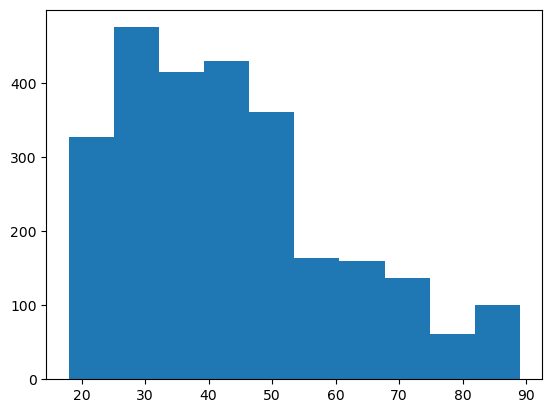

In [93]:
#Vamos a ver los valores salidos de lo normal, por medio de un histograma, va por columnas numéricas

#Age
df_clientes['Age'].plot(kind='hist',binds=10)
#Salió un error pero si el histograma, al parecer es una cuestión de versiones por problemas que he tenido antes con 
#Python pero todo corre bien 
#Al parecer hay adultos mayores potenciales clientes, entre 80 y 90 años, no es malo para pensar que es 
#Outlayer, pero podría verse como un valor atípico. No lo borro, por que no se debe de borrar

AttributeError: Rectangle.set() got an unexpected keyword argument 'binds'

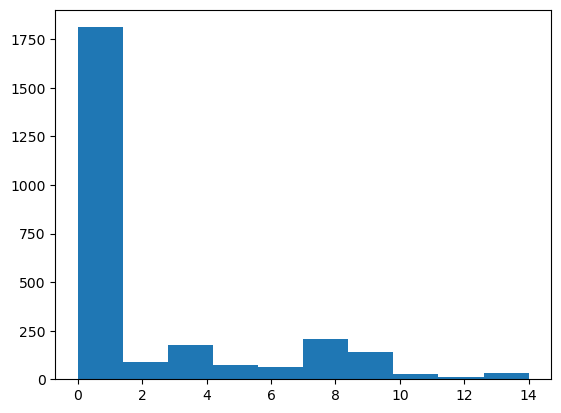

In [96]:
#Work_Experience
df_clientes['Work_Experience'].plot(kind='hist',binds=10)

#Los años de experiencia podrían o no ser atípicos

AttributeError: Rectangle.set() got an unexpected keyword argument 'binds'

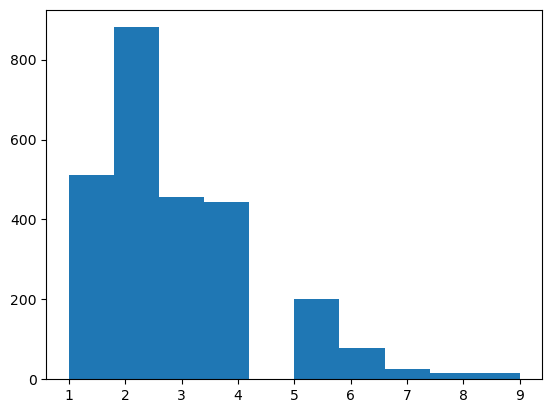

In [101]:
#Spending_Score
df_clientes['Family_Size'].plot(kind='hist',binds=10)

#Cómo podemos ver, si hay un valor atípico: no hay gente que tenga 5 hijos, lo que es extraño por que 
#Algunos incluso tienen 9. No borraré nada, pero es la observación

## 4.1 Datos numéricos

In [113]:
#Vamos a obtener qué hacer con los datos que sacamos de las barras 
#(Numéricas) podemos tener los rangos
df_clientes['Family_Size'].value_counts(bins=10).sort_index()
#Ahora vemos los rangos y el recuento de cada uno de los niveles d enumero de hijos

(0.991, 1.8]    512
(1.8, 2.6]      881
(2.6, 3.4]      455
(3.4, 4.2]      444
(4.2, 5.0]      200
(5.0, 5.8]        0
(5.8, 6.6]       78
(6.6, 7.4]       26
(7.4, 8.2]       15
(8.2, 9.0]       16
Name: count, dtype: int64

In [115]:
df_clientes['Age'].value_counts(bins=10).sort_index()

(17.927999999999997, 25.1]    327
(25.1, 32.2]                  475
(32.2, 39.3]                  414
(39.3, 46.4]                  430
(46.4, 53.5]                  361
(53.5, 60.6]                  164
(60.6, 67.7]                  159
(67.7, 74.8]                  136
(74.8, 81.9]                   61
(81.9, 89.0]                  100
Name: count, dtype: int64

In [117]:
#Obtener los rangos de valores de cada barra
df_clientes['Work_Experience'].value_counts(bins=10).sort_index()

(-0.015, 1.4]    1811
(1.4, 2.8]         87
(2.8, 4.2]        175
(4.2, 5.6]         76
(5.6, 7.0]        121
(7.0, 8.4]        149
(8.4, 9.8]        139
(9.8, 11.2]        25
(11.2, 12.6]       12
(12.6, 14.0]       32
Name: count, dtype: int64

## 4.2 Datos categóricos

<Axes: xlabel='Ever_Married'>

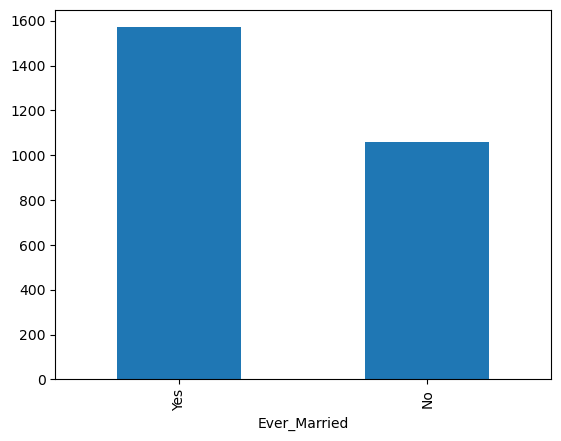

In [119]:
#Vamos a gráficas 
df_clientes['Ever_Married'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

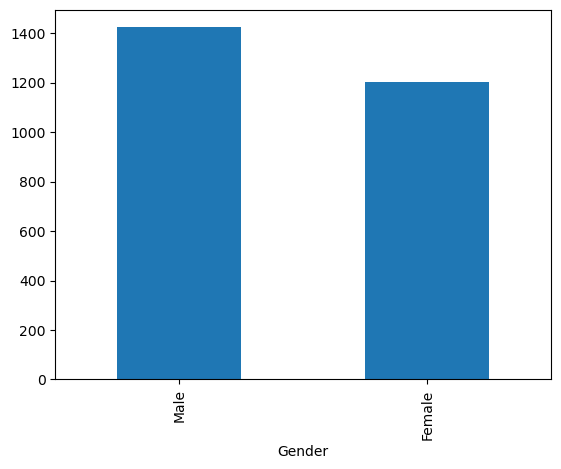

In [121]:
#Vamos a gráficas 
df_clientes['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Graduated'>

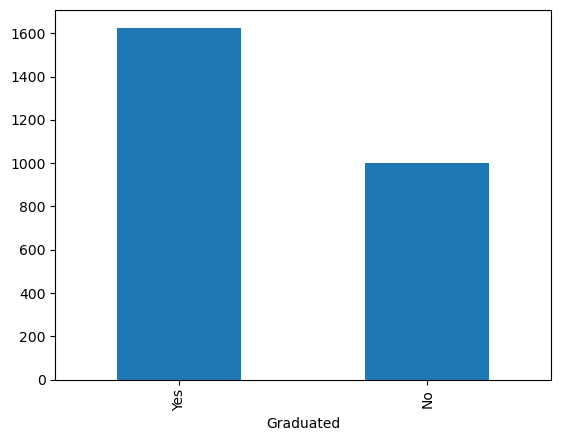

In [123]:
#Vamos a gráficas 
df_clientes['Graduated'].value_counts().plot(kind='bar')

<Axes: xlabel='Profession'>

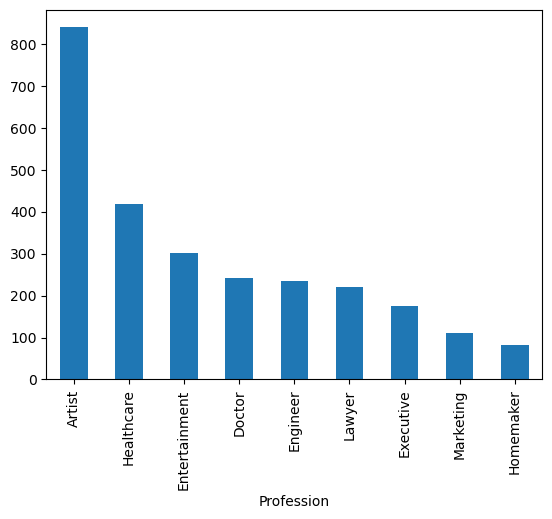

In [125]:
#Vamos a gráficas 
df_clientes['Profession'].value_counts().plot(kind='bar')

<Axes: xlabel='Spending_Score'>

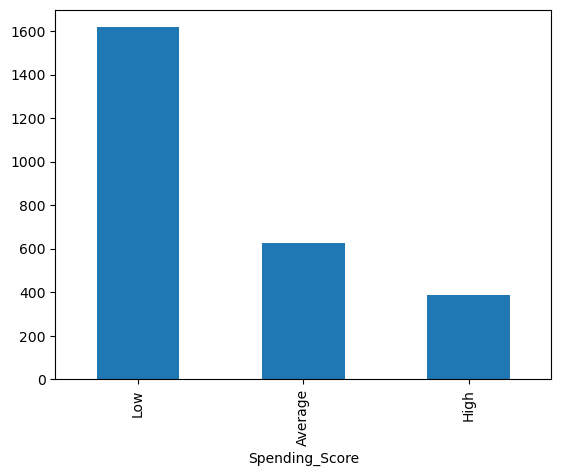

In [127]:
#Vamos a gráficas 
df_clientes['Spending_Score'].value_counts().plot(kind='bar')

<Axes: xlabel='Var_1'>

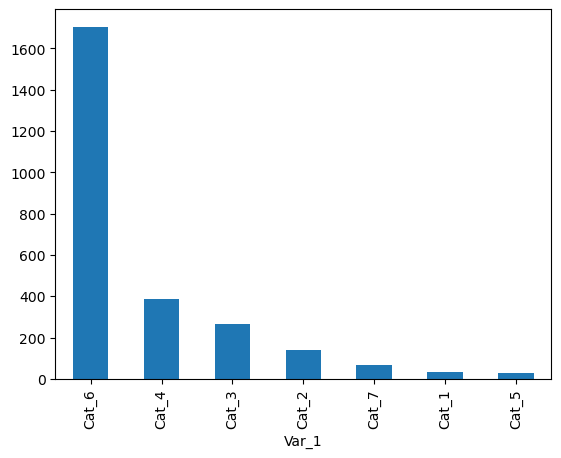

In [129]:
#Vamos a gráficas 
df_clientes['Var_1'].value_counts().plot(kind='bar')

## Conclusiones

##### Para no hacer la lectura más larga, por que arriba ya describí mucho de lo que estaba pasando:
##### Este DataSet reune las características de varios posibles compradores: trata de definir que tipo o que modelo de cliente es más propenso a comprar. Durante el proceso nos dimos cuenta que las personas casadas con hijos son más propensas, además de que tienden a ser más bien hombres con algún tipo de carrera. Hay muchos artistas, a mi me resulta curioso, pero bueno. También que hay algunas personas con más de 6 hijos y adultos muy mayores de casi 90 años. No está mal, es un poco extraño pero no mal. No se borró nada del dataset, solo mostraba el 2.22% de nulos, lo cuál es bajo y lo hace bueno para trabajar sobre él. Solo rellené valores con moda, los que más se repiten, según la estadítica eso es conveniente
##### En conclusión: según mis conclusiones, en el mercado habrá más hombres casados, graduados de entre 30 y 50 años, con dos o más hijos, probablemente

## 5. Guarde el dateset limpio

In [132]:
# Guardar en un dataset limpio la información obtenida
df_clientes.to_csv(r"C:\Users\Administrador\MachineLearningTech\U1_Procesamiento_de_datos\EXAMEN\clientes_limpio.csv")